In [48]:
from bs4 import BeautifulSoup
import requests

In [49]:
url = "https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/grades.json"
req = requests.get(url)

In [50]:
soup = BeautifulSoup(req.content)

In [51]:
soup

<html><body><p>{ "_id" : { "$oid" : "50b59cd75bed76f46522c34e" }, "student_id" : 0, "class_id" : 2, "scores" : [ { "type" : "exam", "score" : 57.92947112575566 }, { "type" : "quiz", "score" : 21.24542588206755 }, { "type" : "homework", "score" : 68.19567810587429 }, { "type" : "homework", "score" : 67.95019716560351 }, { "type" : "homework", "score" : 18.81037253352722 } ] }
{ "_id" : { "$oid" : "50b59cd75bed76f46522c34f" }, "student_id" : 0, "class_id" : 28, "scores" : [ { "type" : "exam", "score" : 39.17749400402234 }, { "type" : "quiz", "score" : 78.44172815491468 }, { "type" : "homework", "score" : 20.81782269075502 }, { "type" : "homework", "score" : 70.44520452408949 }, { "type" : "homework", "score" : 50.66616327819226 }, { "type" : "homework", "score" : 53.84983118363991 } ] }
{ "_id" : { "$oid" : "50b59cd75bed76f46522c350" }, "student_id" : 0, "class_id" : 5, "scores" : [ { "type" : "exam", "score" : 88.22950674232497 }, { "type" : "quiz", "score" : 79.28962650427184 }, { "typ

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [53]:
df = pd.read_json("https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/grades.json",lines=True)

In [54]:
df

,_id,student_id,class_id,scores
0,{'$oid': '50b59cd75bed76f46522c34e'},0,2,"[{'type': 'exam', 'score': 57.92947112575566},..."
1,{'$oid': '50b59cd75bed76f46522c34f'},0,28,"[{'type': 'exam', 'score': 39.17749400402234},..."
2,{'$oid': '50b59cd75bed76f46522c350'},0,5,"[{'type': 'exam', 'score': 88.22950674232497},..."
3,{'$oid': '50b59cd75bed76f46522c351'},0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ..."
4,{'$oid': '50b59cd75bed76f46522c352'},0,24,"[{'type': 'exam', 'score': 4.444435759027499},..."
...,...,...,...,...
275,{'$oid': '50b59cd75bed76f46522c461'},48,10,"[{'type': 'exam', 'score': 19.75901367795435},..."
276,{'$oid': '50b59cd75bed76f46522c462'},48,14,"[{'type': 'exam', 'score': 66.79008851052096},..."
277,{'$oid': '50b59cd75bed76f46522c463'},48,8,"[{'type': 'exam', 'score': 87.50309579619501},..."
278,{'$oid': '50b59cd75bed76f46522c464'},48,15,"[{'type': 'exam', 'score': 17.49112864462374},..."


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         280 non-null    object
 1   student_id  280 non-null    int64 
 2   class_id    280 non-null    int64 
 3   scores      280 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.9+ KB


In [58]:
def new_1(val1):
  return val1[0]['score']
df['exam_score']=df['scores'].apply(new_1)
def new_2(val2):
  return val2[1]['score']
df['quiz_score']=df['scores'].apply(new_2)
def new_3(val3):
  one = val3[-3]['score']
  two = val3[-2]['score']
  three = val3[-1]['score']
  return round((one+two+three)/3,2)
df['homework_score']=df['scores'].apply(new_3)

In [59]:
for i in range(df.shape[0]):
  new_id = dict(df.loc[i,'_id']).values()
  df.loc[i,"_id"] = new_id

In [60]:
df

,_id,student_id,class_id,scores,exam_score,quiz_score,homework_score
0,(50b59cd75bed76f46522c34e),0,2,"[{'type': 'exam', 'score': 57.92947112575566},...",57.929471,21.245426,51.65
1,(50b59cd75bed76f46522c34f),0,28,"[{'type': 'exam', 'score': 39.17749400402234},...",39.177494,78.441728,58.32
2,(50b59cd75bed76f46522c350),0,5,"[{'type': 'exam', 'score': 88.22950674232497},...",88.229507,79.289627,43.49
3,(50b59cd75bed76f46522c351),0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ...",59.180567,47.589602,51.12
4,(50b59cd75bed76f46522c352),0,24,"[{'type': 'exam', 'score': 4.444435759027499},...",4.444436,28.630579,66.45
...,...,...,...,...,...,...,...
275,(50b59cd75bed76f46522c461),48,10,"[{'type': 'exam', 'score': 19.75901367795435},...",19.759014,88.302701,30.80
276,(50b59cd75bed76f46522c462),48,14,"[{'type': 'exam', 'score': 66.79008851052096},...",66.790089,6.835625,52.55
277,(50b59cd75bed76f46522c463),48,8,"[{'type': 'exam', 'score': 87.50309579619501},...",87.503096,77.950480,58.06
278,(50b59cd75bed76f46522c464),48,15,"[{'type': 'exam', 'score': 17.49112864462374},...",17.491129,26.629811,52.28


In [61]:
df['scores'][0]

[{'type': 'exam', 'score': 57.92947112575566},
 {'type': 'quiz', 'score': 21.24542588206755},
 {'type': 'homework', 'score': 68.1956781058743},
 {'type': 'homework', 'score': 67.95019716560351},
 {'type': 'homework', 'score': 18.81037253352722}]

In [62]:
# exam_scores = []
# for i in range(len(df['scores'])):
#   exam_scores.append(re.sub('^{.*: |}','',str(df['scores'][i][0])))

In [63]:
exam_score = [round(float(re.sub('^{.*: |}','',str(df['scores'][i][0]))),2)for i in range(len(df['scores']))]
quiz_score = [round(float(re.sub('^{.*: |}','',str(df['scores'][i][1]))),2)for i in range(len(df['scores']))]
homework_score = [round(float(re.sub('^{.*: |}','',str(df['scores'][i][2]))),2)for i in range(len(df['scores']))]

In [64]:
exam_score

[57.93,
 39.18,
 88.23,
 59.18,
 4.44,
 14.34,
 18.2,
 56.82,
 60.19,
 58.83,
 30.93,
 63.1,
 47.39,
 24.05,
 80.62,
 68.93,
 5.23,
 70.33,
 76.02,
 35.48,
 47.72,
 88.81,
 95.99,
 95.8,
 86.26,
 8.94,
 31.09,
 0.6,
 5.47,
 44.49,
 46.18,
 60.14,
 91.6,
 0.65,
 67.51,
 15.37,
 73.48,
 73.04,
 21.58,
 43.65,
 22.39,
 33.4,
 46.18,
 98.35,
 55.41,
 7.22,
 62.87,
 54.54,
 24.77,
 28.34,
 62.6,
 7.34,
 43.23,
 89.13,
 40.25,
 11.46,
 85.3,
 84.87,
 58.04,
 32.06,
 68.49,
 64.93,
 73.51,
 56.73,
 85.31,
 24.14,
 76.44,
 85.21,
 69.18,
 46.41,
 8.56,
 13.21,
 9.88,
 49.62,
 43.93,
 30.86,
 78.2,
 26.99,
 74.52,
 93.69,
 83.05,
 99.7,
 79.77,
 99.49,
 36.82,
 22.32,
 94.08,
 4.44,
 84.22,
 26.11,
 77.02,
 53.36,
 25.84,
 69.74,
 25.58,
 96.97,
 75.93,
 65.21,
 43.78,
 50.45,
 28.45,
 47.52,
 19.1,
 49.38,
 24.21,
 16.78,
 46.16,
 33.73,
 18.14,
 92.88,
 86.11,
 12.07,
 7.23,
 61.47,
 46.2,
 64.0,
 55.94,
 27.69,
 82.81,
 32.89,
 89.94,
 90.03,
 47.17,
 21.11,
 30.87,
 55.05,
 84.12,
 50.24,
 

In [65]:
quiz_score

[21.25,
 78.44,
 79.29,
 47.59,
 28.63,
 47.66,
 60.48,
 15.03,
 64.16,
 49.67,
 55.98,
 69.08,
 9.96,
 77.89,
 40.65,
 65.4,
 9.92,
 66.24,
 47.45,
 94.14,
 82.49,
 42.2,
 70.27,
 99.71,
 0.72,
 66.81,
 78.16,
 78.68,
 48.7,
 89.45,
 82.2,
 16.49,
 77.87,
 65.75,
 60.43,
 15.06,
 75.01,
 27.96,
 3.63,
 62.64,
 61.1,
 92.72,
 91.53,
 34.61,
 80.78,
 0.86,
 29.46,
 8.36,
 67.45,
 3.74,
 32.67,
 68.79,
 48.71,
 11.49,
 69.1,
 1.85,
 8.01,
 16.57,
 11.0,
 5.03,
 86.58,
 32.2,
 90.79,
 12.07,
 63.13,
 18.72,
 24.01,
 45.5,
 61.2,
 10.18,
 5.21,
 26.92,
 4.95,
 59.86,
 82.6,
 87.66,
 81.95,
 50.03,
 1.12,
 97.44,
 74.58,
 51.99,
 72.01,
 20.62,
 1.24,
 95.36,
 90.87,
 15.03,
 68.51,
 44.01,
 3.35,
 45.11,
 12.95,
 74.54,
 85.78,
 44.17,
 70.61,
 57.3,
 73.37,
 92.15,
 61.68,
 47.41,
 58.76,
 78.27,
 72.48,
 3.42,
 16.13,
 45.87,
 64.67,
 3.51,
 79.08,
 27.33,
 59.82,
 23.89,
 3.79,
 35.13,
 48.33,
 25.21,
 26.89,
 82.37,
 75.88,
 11.5,
 99.91,
 41.76,
 77.98,
 95.2,
 82.22,
 55.86,
 3.69,
 

In [66]:
homework_score

[68.2,
 20.82,
 18.66,
 6.48,
 86.79,
 83.43,
 75.63,
 59.59,
 82.81,
 18.06,
 55.68,
 34.69,
 22.18,
 68.82,
 91.51,
 43.11,
 76.72,
 79.22,
 4.74,
 58.43,
 75.44,
 14.97,
 48.77,
 91.74,
 70.08,
 70.07,
 40.75,
 64.12,
 84.0,
 43.21,
 84.69,
 20.65,
 56.6,
 73.27,
 98.63,
 23.96,
 86.41,
 22.87,
 68.25,
 89.13,
 95.22,
 69.97,
 38.58,
 47.36,
 5.33,
 76.59,
 32.02,
 7.11,
 10.17,
 83.2,
 62.43,
 84.12,
 85.91,
 16.97,
 86.44,
 61.65,
 88.8,
 18.51,
 98.92,
 4.65,
 60.05,
 59.41,
 85.84,
 45.72,
 95.64,
 69.02,
 11.51,
 52.77,
 73.33,
 46.31,
 41.32,
 23.13,
 86.98,
 99.45,
 30.59,
 92.25,
 0.05,
 97.38,
 81.77,
 22.11,
 9.69,
 93.56,
 67.35,
 1.82,
 5.6,
 19.34,
 3.51,
 48.34,
 48.14,
 39.48,
 42.69,
 3.44,
 97.93,
 87.0,
 6.99,
 33.16,
 14.05,
 90.76,
 17.19,
 63.59,
 48.7,
 38.44,
 25.46,
 2.45,
 5.24,
 10.42,
 50.36,
 67.44,
 85.06,
 39.57,
 4.45,
 47.02,
 57.66,
 57.84,
 53.76,
 41.38,
 3.75,
 66.33,
 91.91,
 11.5,
 31.85,
 92.55,
 8.17,
 81.84,
 45.13,
 79.95,
 36.83,
 26.52,
 1

In [67]:
for i in range(len(df['scores'])):
  li = re.findall('\d+.\d+',str(df['scores'][i][2:]))
  print(sum(list(map(float,li)))/len(list(map(float,li))))        # string to integer   # mean

51.65208260166833
48.94475541916917
37.285615669694685
51.11686209068955
85.3549916905628
57.71703559641866
74.0365770007516
73.18284188745221
82.80835343023551
49.0497411988719
59.41459165197117
34.6879008789745
24.746691779778317
80.02259473981883
63.43137163020187
50.000645979349166
49.34915577052276
78.95009338500947
48.69420633105006
62.6345334709348
77.05394481769896
27.45339004161934
28.300966967219424
79.61271018962753
65.54421928997607
56.07199320820657
38.846740029737425
64.11811985669685
72.57458740205128
63.641061811365205
66.79918795077687
38.883810860608214
67.87259371597293
49.41745360244225
60.24603652783378
62.13122056430456
63.73034300812602
35.58816088312381
46.352500125088675
71.00692284091306
49.959488234511774
65.40765490288196
38.57523921619017
47.3557826474249
5.32775635719569
41.968063310913585
32.34466299077795
26.456761200990854
34.32049137031407
42.408683825665115
59.89364398601915
84.12135157457064
69.12995617819203
36.17621310925917
47.13593064518225
61.65

In [68]:
df.head(1)

,_id,student_id,class_id,scores,exam_score,quiz_score,homework_score
0,(50b59cd75bed76f46522c34e),0,2,"[{'type': 'exam', 'score': 57.92947112575566},...",57.929471,21.245426,51.65


In [71]:
new_df = pd.DataFrame({
    "id": df['_id'],
    "student_id": df['student_id'],
    "class_id": df['class_id'],
    "exam_score": df['exam_score'],
    "quiz_score": df['quiz_score'],
    "homework_score": df['homework_score']
})


In [73]:
  new_df

,id,student_id,class_id,exam_score,quiz_score,homework_score
0,(50b59cd75bed76f46522c34e),0,2,57.929471,21.245426,51.65
1,(50b59cd75bed76f46522c34f),0,28,39.177494,78.441728,58.32
2,(50b59cd75bed76f46522c350),0,5,88.229507,79.289627,43.49
3,(50b59cd75bed76f46522c351),0,16,59.180567,47.589602,51.12
4,(50b59cd75bed76f46522c352),0,24,4.444436,28.630579,66.45
...,...,...,...,...,...,...
275,(50b59cd75bed76f46522c461),48,10,19.759014,88.302701,30.80
276,(50b59cd75bed76f46522c462),48,14,66.790089,6.835625,52.55
277,(50b59cd75bed76f46522c463),48,8,87.503096,77.950480,58.06
278,(50b59cd75bed76f46522c464),48,15,17.491129,26.629811,52.28


In [74]:
new_df.drop(['student_id'],inplace=True,axis=1)

In [75]:
new_df

,id,class_id,exam_score,quiz_score,homework_score
0,(50b59cd75bed76f46522c34e),2,57.929471,21.245426,51.65
1,(50b59cd75bed76f46522c34f),28,39.177494,78.441728,58.32
2,(50b59cd75bed76f46522c350),5,88.229507,79.289627,43.49
3,(50b59cd75bed76f46522c351),16,59.180567,47.589602,51.12
4,(50b59cd75bed76f46522c352),24,4.444436,28.630579,66.45
...,...,...,...,...,...
275,(50b59cd75bed76f46522c461),10,19.759014,88.302701,30.80
276,(50b59cd75bed76f46522c462),14,66.790089,6.835625,52.55
277,(50b59cd75bed76f46522c463),8,87.503096,77.950480,58.06
278,(50b59cd75bed76f46522c464),15,17.491129,26.629811,52.28


<BarContainer object of 10 artists>

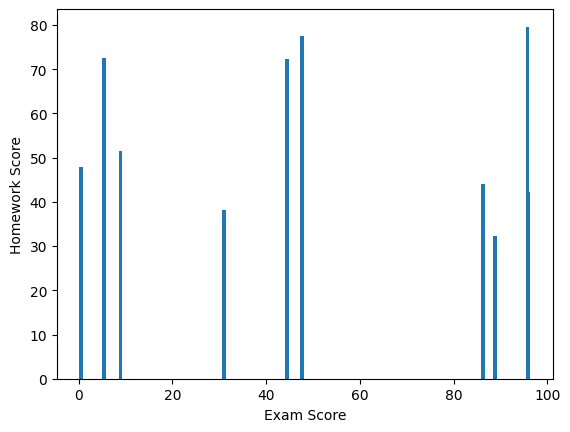

In [78]:
x = new_df.exam_score[20:30]
y = new_df.homework_score[20:30]
plt.xlabel("Exam Score")
plt.ylabel("Homework Score")
plt.bar(x,y)

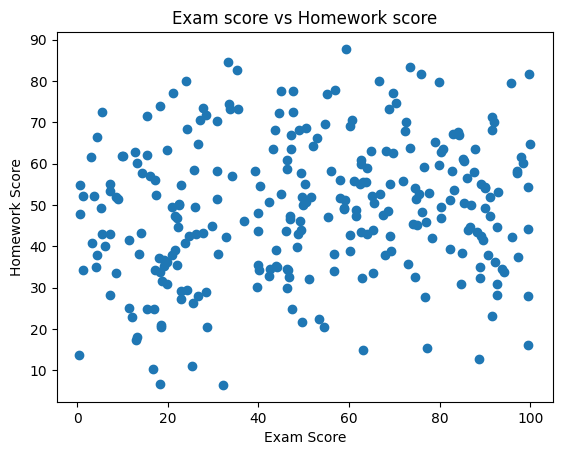

In [79]:
x = new_df.exam_score
y = new_df.homework_score
plt.scatter(x,y)
plt.xlabel("Exam Score")
plt.ylabel("Homework Score")
plt.title("Exam score vs Homework score")
plt.show()